In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

recent_grads = pd.read_csv("recent-grads.csv")

print(recent_grads.iloc[0,:])

print(recent_grads.head(20))

print(recent_grads.tail(20))

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
    Rank  M

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = len(recent_grads["Rank"])

print(raw_data_count)

recent_grads = recent_grads.dropna()

cleaned_data_count = len(recent_grads["Rank"])

print(cleaned_data_count)

173
172


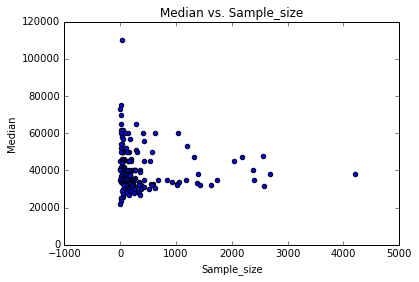

In [13]:
ax1= recent_grads.plot(x = 'Sample_size', y= "Median", kind = "scatter")
ax1.set_title ("Median vs. Sample_size")
plt.show()

There does not appear to be a strong link between the sample size and the median salary in each of these fields. The sample size that is clustered near zero shows extreme stratification, while the general trend as sample size increases is a very weakly negative correlation. In order to better analyze the data, we can zoom in on the sample size and look at the smaller samples to get a bit of a better idea:

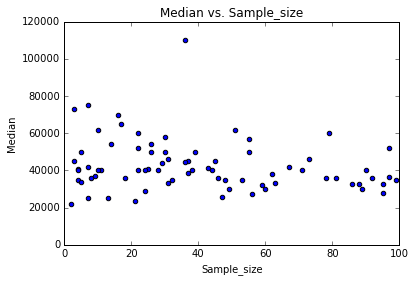

In [21]:
ax1= recent_grads.plot(x = 'Sample_size', y= "Median", kind = "scatter")
ax1.set_title ("Median vs. Sample_size")
ax1.set_xlim(0,100)
plt.show()

Here the effect mirrors the macroscopic picture, but a bit stronger. A negative relationship, but an extremely gradual one. Due to the relatively small samples here we cannot extrapolate much further than that.

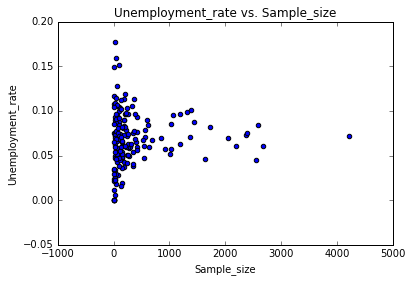

In [12]:
ax2= recent_grads.plot(x = 'Sample_size', y= "Unemployment_rate", kind = "scatter")
ax2.set_title ("Unemployment_rate vs. Sample_size")
plt.show()

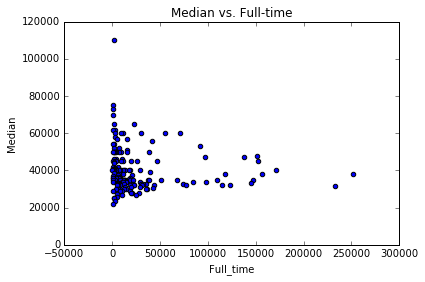

In [14]:
ax3= recent_grads.plot(x = 'Full_time', y= "Median",kind = "scatter")
ax3.set_title ("Median vs. Full-time")
plt.show()

There is a general downward trend that suggests that the number of full-time employees increasing shows a corresponding decrease in median salary in the field. This somewhat coincides with what neoclassical economic analysis would suggest about the scarcity of skilled labor. There is also great stratification at the lower end of the full-time employment range. This picture certainly gels with the economic reality of life as an American laborer in the 21st century, as we would expect dramatic shifts in how people sell their labor if median wages went up as more laborers entered an industry.

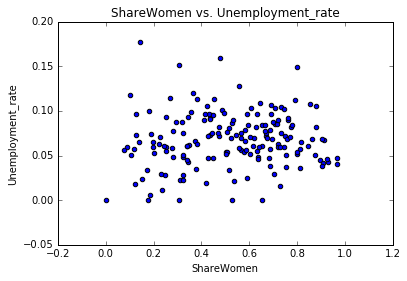

In [15]:
ax= recent_grads.plot(x = 'ShareWomen', y= "Unemployment_rate",kind = "scatter")
ax.set_title ("ShareWomen vs. Unemployment_rate")
plt.show()

This plot is difficult to glean much information from, as there appears to be no strong trend relating the unemployment rate to gender ratios.

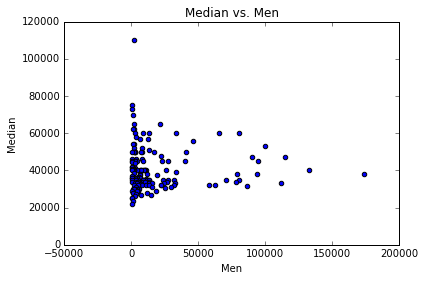

In [16]:
ax= recent_grads.plot(x = 'Men', y= "Median",kind = "scatter")
ax.set_title ("Median vs. Men")
plt.show()

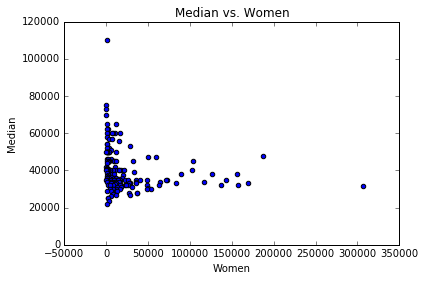

In [18]:
ax= recent_grads.plot(x = 'Women', y= "Median",kind = "scatter")
ax.set_title ("Median vs. Women")
plt.show()

These two plots suggest that men make more money than women at similar employment concentrations. It is also the case that the variance is much greater among male employees than among female employees, which suggests categorical wage discrimination against women, as there is a great deal more explained variance in the Women vs. Median plot compared to the Men vs. Median plot.

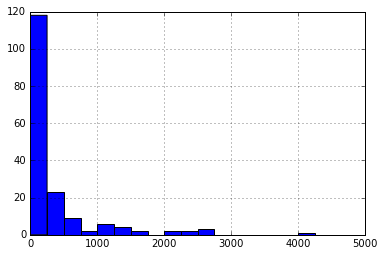

In [25]:
recent_grads["Sample_size"].hist(bins=20,range = (0,5000))

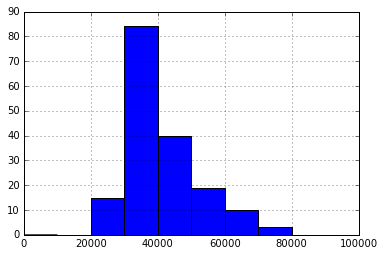

In [24]:
recent_grads["Median"].hist(bins=10,range = (0,100000))

The most common median salary range for new grads is \\$30,000-40,0000, with approximately 83 of the 173 observations recorded in this range. The next-most common range is \$40,000-50,000 with approximately 40 of the 173 observations recorded in this range.

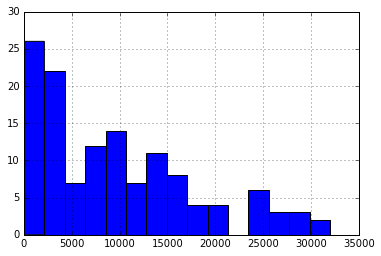

In [27]:
recent_grads["Employed"].hist(bins=15,range = (0,32000))

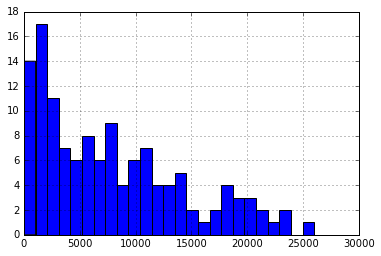

In [29]:
recent_grads["Full_time"].hist(bins=25,range = (0,26000))

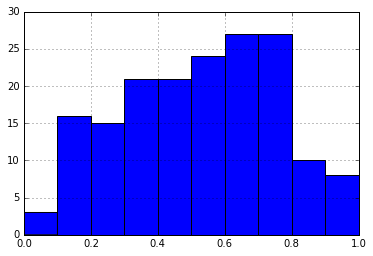

In [30]:
recent_grads["ShareWomen"].hist(bins=10,range = (0,1))

Of the 172 observations:
3 fell between 0-10pct women
16 fell between 10-20pct women
15 fell between 20-30pct women
21 fell between 30-40 pct women
21 fell between 40-50 pct women

3 + 16 + 15 + 21 + 21 = 76 total majors that are majority men. This reduces
to a percentage of 76/172, or approximately 44.2 pct. That leaves 55.8 pct of the remaining observations comprising of majors that are majority women.

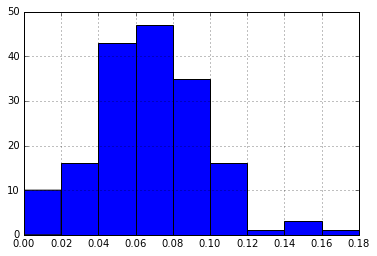

In [34]:
recent_grads["Unemployment_rate"].hist(bins=9,range = (0,.18))

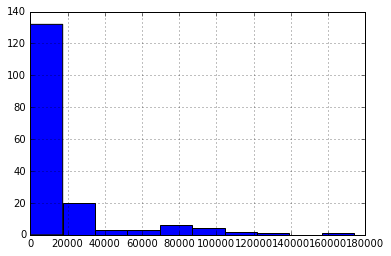

In [40]:
recent_grads["Men"].hist(bins=10,range = (0,174000))

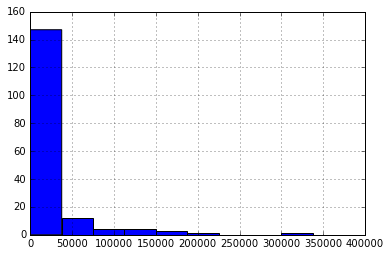

In [42]:
recent_grads["Women"].hist(bins=10,range = (0,375000))

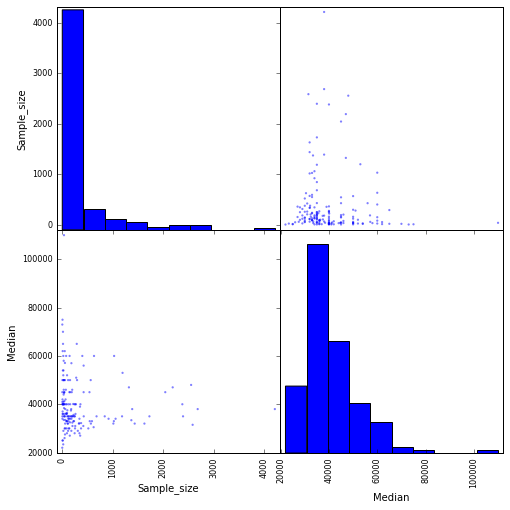

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]],figsize = (8,8))
plt.show()

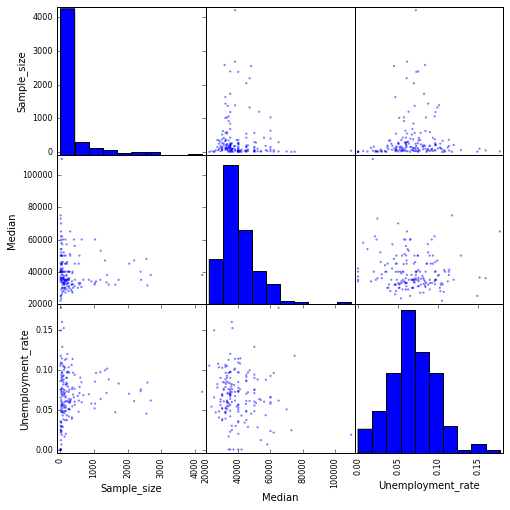

In [51]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize = (8,8))
plt.show()

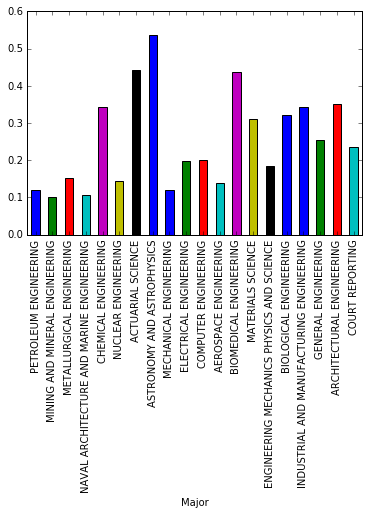

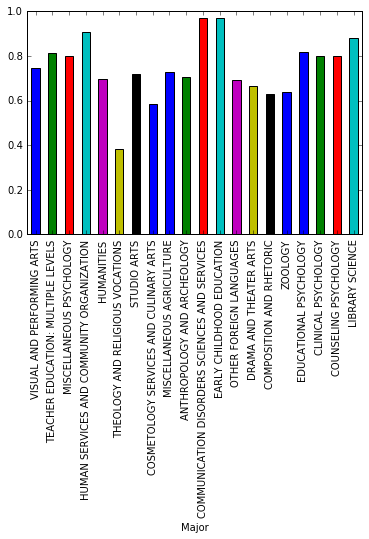

In [61]:
first_twenty = recent_grads.head(20)

last_twenty = recent_grads.tail(20)

first_and_last_twenty = first_twenty.append(last_twenty)

first_twenty.plot.bar(x = "Major", y = "ShareWomen", legend = False)

last_twenty.plot.bar(x = "Major", y = "ShareWomen", legend = False)

plt.show()

The categorical trend that this data shows is that in general, women tend to participate less in hard science fields and into the humanities, social sciences, education, and community service and organization. There are some notable exceptions. Astronomy and astrophysics has a majority share of women, while both actuarial and materials science are within striking distance of 50pct. There are also much higher concentrations of women in biomedical and chemical engineering than in other "hard" engineering fields, while there is also a strong concentration of women in architectural engineering.

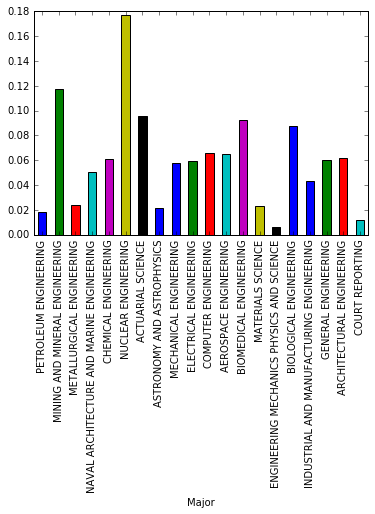

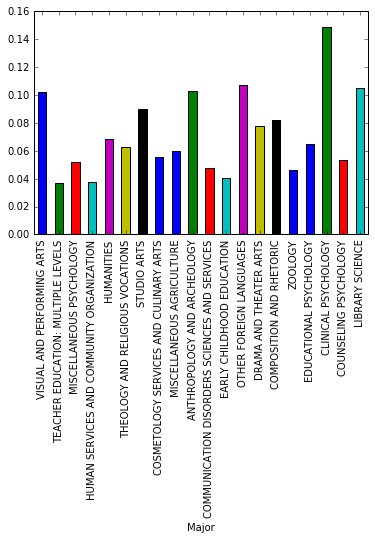

In [64]:
first_twenty.plot.bar(x = "Major", y = "Unemployment_rate", legend = False)

last_twenty.plot.bar(x = "Major", y = "Unemployment_rate", legend = False)

plt.show()

The standouts are nuclear engineering, mining and mineral engineering, and clinical psychology, which have many qualified professionals but are also fields that have constrained funding in the current socioenvironmental and political climate. I am unsure why there appears to be a statistically significant gap between actuarial science, bio & biomedical engineering and many of the other first 10, and it would require more stringent data analysis about those economic sectors. There are also some stereotypically "soft" professions that suffer from above average unemployment, but not drastically so, like the visual & studio arts, anthropology, and foreign language specialization.